In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot as up

In [3]:
tower2p1_events=pd.read_csv("pulse_out/Tower2p1_event_info.csv") #contains reconstruction information
pulses_tower2p1=up.concatenate(["pulse_out/Run352044_tower2p1.root:tree"],library='np')['samples'] #pulses
event_nums_tower2p1=up.concatenate(["pulse_out/Run352044_tower2p1.root:tree"],library='np')['event_number'] #event numbers to connect pulses to reconstruction info

ADC2mV=8.0108642578125e-02 ##this number should be checked with up-to-date front end board readings, but is fine for now

In [4]:
tower2p1_events

,Channel,Time,CoincTime,NumPulses,OFdelay,OFChi2,Energy,Baseline,MaxToBaseline,Run,PCANorm,event_number,BaselineSlope,SingleTrigger
0,54,1018.808,1015.720415,1,3.119665,3.511851,2617.897933,-5949.946025,1135.256388,352044,4.796232,81146,-0.004776,False
1,53,1029.120,1026.040443,1,3.119646,959.445237,1291.883245,-3041.182805,616.774846,352044,16.963644,81911,-0.000647,True
2,58,1056.312,1053.235369,1,3.086841,10.635230,2600.413432,-3019.474859,1154.465551,352044,14.263034,84090,-0.004409,True
3,55,1060.072,1057.011309,1,3.070154,0.177860,737.921289,-3309.880651,198.861516,352044,10.408411,84367,-0.002333,True
4,56,1067.584,1064.502041,1,3.122515,1.473148,1424.047190,-2917.889409,584.885412,352044,1.821491,85011,-0.000906,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24858,59,128172.264,128169.191868,1,3.090579,8.643130,2336.963051,-4723.471242,1099.356252,352044,11.374310,10152655,-0.002778,True
24859,64,128188.112,128185.029504,1,3.123739,0.686072,825.788777,-6597.101735,357.279348,352044,-0.920750,10153787,-0.002088,True
24860,62,128193.784,128190.698521,1,3.115107,1.280897,1114.787370,-3414.805634,669.562561,352044,-0.708036,10154324,-0.001870,True
24861,61,128194.640,128191.566482,1,3.092249,2.601401,662.462041,-4403.333359,308.580093,352044,-0.435548,10154390,-0.000717,True


In [5]:
tower2p1_events["Channel"].unique()

array([54, 53, 58, 55, 56, 62, 61, 65, 64, 57, 60, 59, 63])

In [6]:
CHANNEL=60 #hard-coding this for now...

In [7]:
file=open("average_pulse_dump/Channel00"+str(CHANNEL)+"_AveragePulse.txt")
for line in file:
    parse=line.replace("fData  ","")
    parse=parse.replace("\n","")
    splits=parse.split(" ")
    avg_pulse=np.array(splits,dtype=float)
    break

cleaned_avg_pulse=(avg_pulse-np.mean(avg_pulse[0:50]))/np.max(avg_pulse-np.mean(avg_pulse[0:50]))

Text(0, 0.5, 'Pulse Amplitude: Correlates to E')

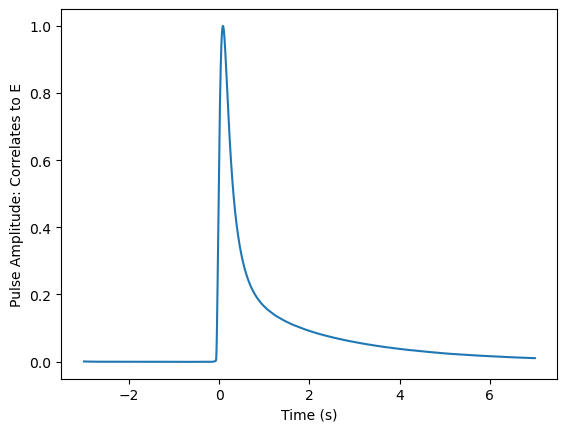

In [8]:
#check out what normalized average pulse for channel 60 is

fully_sampled_times=np.linspace(-3,7,10000) #seconds

plt.plot(fully_sampled_times,cleaned_avg_pulse)

plt.xlabel("Time (s)")
plt.ylabel("Pulse Amplitude: Correlates to E")

In [9]:
THIS_PULSE=8272 #pulse we'll focus on, to get nODE working

In [10]:
#check info on it...

#how to pass back & forth between event number & pulse id...
tower2p1_events[tower2p1_events['event_number']==event_nums_tower2p1[THIS_PULSE]]

,Channel,Time,CoincTime,NumPulses,OFdelay,OFChi2,Energy,Baseline,MaxToBaseline,Run,PCANorm,event_number,BaselineSlope,SingleTrigger
8272,60,43488.616,43485.538606,1,3.079257,4.561317,1123.404947,-4594.086314,390.785838,352044,0.430006,3448536,0.001447,True


In [11]:
THIS_ENERGY=tower2p1_events[tower2p1_events['event_number']==event_nums_tower2p1[THIS_PULSE]].iloc[0]['Energy']

1123.4049474985482  keV


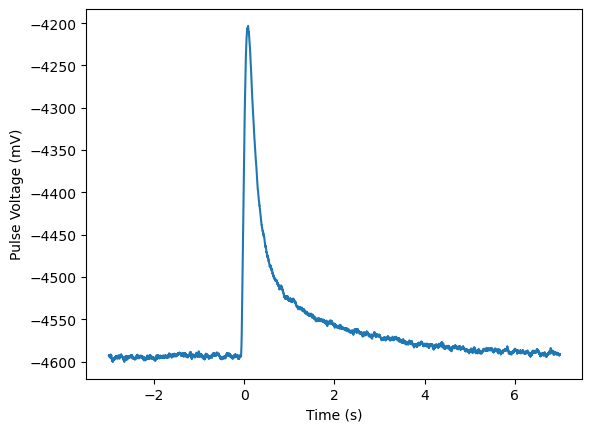

In [12]:
plt.plot(np.linspace(-3,7,10000),ADC2mV*pulses_tower2p1[THIS_PULSE])

plt.xlabel("Time (s)")
plt.ylabel("Pulse Voltage (mV)")

print(THIS_ENERGY, " keV")

In [13]:
pulses_tower2p1

array([[-74182, -74180, -74182, ..., -74286, -74289, -74289],
       [-37945, -37953, -37955, ..., -37966, -37958, -37950],
       [-37614, -37620, -37625, ..., -37743, -37740, -37736],
       ...,
       [-42675, -42675, -42678, ..., -42637, -42637, -42637],
       [-54926, -54922, -54917, ..., -54976, -54986, -54995],
       [-39121, -39119, -39126, ..., -39519, -39522, -39521]], dtype=int32)

1123.4049474985482  keV


(-0.1, 0.1)

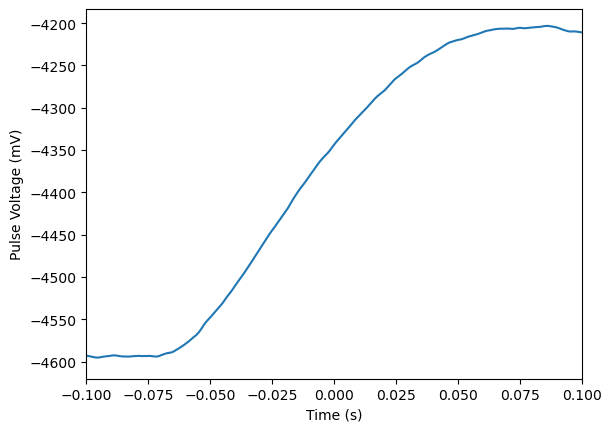

In [14]:
plt.plot(np.linspace(-3,7,10000),ADC2mV*pulses_tower2p1[THIS_PULSE])

plt.xlabel("Time (s)")
plt.ylabel("Pulse Voltage (mV)")

print(THIS_ENERGY, " keV")

plt.xlim([-0.1,0.1])

In [15]:
### feel free to normalize the pulse, e.g. correct for the baseline offset, and make overall amplitude ~0.5

###can start by setting initial condition at time 0, but we should think about how to fine-tune for small time offsets:
### could be grid-search, add differentiable parameter
# this will also be easier when we move beyond 1 pulse to fitting many pulses simulatenously

#initial conditions: should be (0, Energy, 0)
#                               ^    ^     ^
#                               |    |     |
#                               |    |     \- this variable is an extra with no clear interpretation, but can assist in modelling
#                               |    \- this variable models the energy: has initial condition from calibration
#                               \- this variable models the observed pulse, and is the only one entering into the loss
#start off with just our usual MSE-loss between predicted and observed

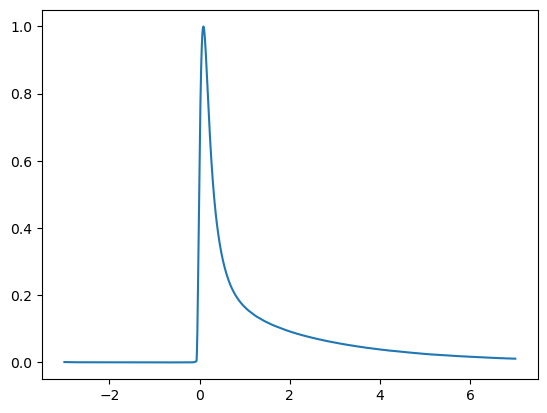

In [104]:
fully_sampled_times=np.linspace(-3,7,10000) #seconds

plt.plot(fully_sampled_times,cleaned_avg_pulse)

In [105]:
df = pd.DataFrame({"Times": np.linspace(-3,7,10000), "Energy": ADC2mV/4200*pulses_tower2p1[THIS_PULSE]})
df


,Times,Energy
0,-3.000,-1.093597
1,-2.999,-1.093674
2,-2.998,-1.093731
3,-2.997,-1.093655
4,-2.996,-1.093559
...,...,...
9995,6.996,-1.093273
9996,6.997,-1.093273
9997,6.998,-1.093311
9998,6.999,-1.093235


In [106]:
df.to_csv('file1.csv')

In [107]:
import numpy as np 
import pandas as pd 

import optax
import matplotlib.pyplot as plt
from typing import List
import equinox as eqx
import jax
import jax.numpy as jnp
import time

import diffrax
import equinox as eqx  # https://github.com/patrick-kidger/equinox
import jax
import jax.nn as jnn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import optax

In [108]:
energies = jnp.array(df["Energy"])
time = jnp.array(df["Times"])
energies += energies[0]*-1

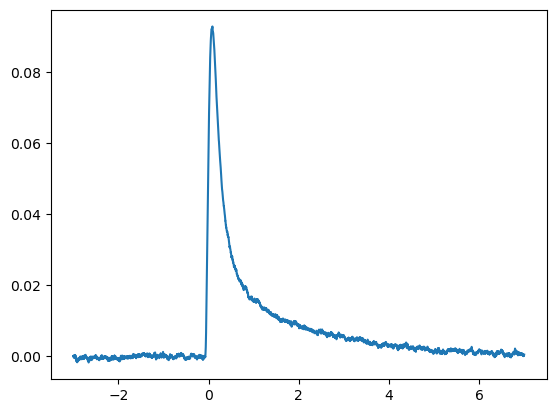

In [109]:
plt.plot(time, energies)

In [110]:
time = time[2900:]
energies = energies[2900:]

In [111]:
energies = energies/max(energies)

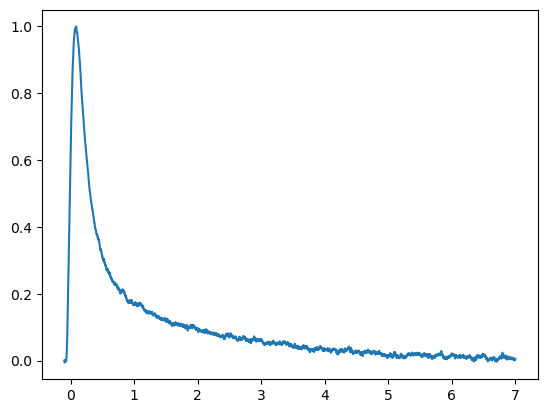

In [112]:
plt.plot(time, energies)

In [113]:
length = len(energies)
z_s = np.linspace(0, 4, length)

In [171]:
class LinearFunction(eqx.Module):
    layers: list

    def __init__(self, key): 
        key1, key2, key3, key4, key5, key6, key7 = jax.random.split(key, 7)
        self.layers = [eqx.nn.Linear(3,6, key = key1, use_bias=True), 
                       eqx.nn.Linear(6,3, key = key1, use_bias=True)] 
    def __call__(self, t, y, *args):
       # print("DEBUG", t,y)
        for layer in self.layers[:-1]:
            y = jax.nn.tanh(layer(y))
        y = self.layers[-1](y)

       # print("DEBUG2", y)
        return y

In [172]:
vars = [energies[0], 10, 0]

In [173]:
energies

Array([ 0.        , -0.00143855, -0.00308261, ...,  0.00308261,
        0.00390464,  0.00513769], dtype=float32)

In [ ]:
def model_to_loss(model, y_s, z_s, t_s):
    # Solve the differential equation
    
   # print(type(t_s))
    #print("MODELTOLOSS", y_s[0], z_s[0], t_s[len[t_s]])
    solutions = diffrax.diffeqsolve(
        diffrax.ODETerm(model),
        diffrax.Tsit5(),
        t0=float(t_s[0]),
        t1=float(t_s[-1]),
        dt0=0.001,
        y0=jnp.array(vars, dtype=jnp.float64),  
        stepsize_controller=diffrax.PIDController(rtol=1e-5, atol=1e-6),
        saveat=diffrax.SaveAt(ts=jnp.sort(t_s)),
    )
    
    y = solutions.ys[:length-1, 0]
    a =  solutions.ys[:length-1, 1]
    b =  solutions.ys[:length-1, 2]
     
   # print(y)

    
    # Use nan_to_num to handle NaNs
    y = jnp.nan_to_num(y, nan=0.0)
   
   
    # Calculate squared differences for the loss
    y_diff = ((y - y_s[:length-1]) ** 2)
    #z_diff = (z - z_s[:N_SAMPLES-1]) ** 2
   # print(jnp.mean(y_diff) + jnp.mean(z_diff))
   # return jnp.sqrt(jnp.mean(y_diff))

   # Predicted outputs
    y = solutions.ys[:length - 1, 0]
    all_outputs = solutions.ys

   
    y_diff = (y - y_s[:length - 1]) ** 2
    squared_loss = jnp.mean(y_diff)

   
    zero_input = jnp.zeros_like(all_outputs[0])
    zero_output = model(0, zero_input)  
    equilibrium_loss = jnp.mean(jnp.abs(zero_output) ** 2)

   
    final_output = all_outputs[-1]
    end_loss = jnp.mean(jnp.abs(final_output))

    reg_lambda = 1e-4

    #l2_loss = reg_lambda * sum(jnp.sum(jnp.square(p)) for p in jax.tree_util.tree_leaves(model) if p.ndim > 0)
    total_loss = (squared_loss + equilibrium_loss)
    return total_loss

In [175]:
model_to_loss_and_grad = eqx.filter_value_and_grad(model_to_loss)
opt = optax.rmsprop(learning_rate=0.003)
key = jax.random.PRNGKey(41)
key, subkey = jax.random.split(key, 2)
"""def custom_schedule(step):
    # Decrease learning rate as the step increases
    return jnp.maximum(0.001, 0.009 * (0.90 ** (step / 10000000)))  # Cap at 0.001

opt = optax.chain(
    optax.scale_by_adam(),
    optax.scale_by_schedule(custom_schedule)
)"""


def make_step(m, opt_s, y_s, z_s, t_s):
    loss, grad = model_to_loss_and_grad(eqx.filter(m, eqx.is_inexact_array), y_s, z_s, t_s)
    updates, opt_s = opt.update(grad, opt_s, m)
    m = eqx.apply_updates(m, updates)
    return m, opt_s, loss

loss_history = []
MODEL = LinearFunction(subkey)
best_loss = float('inf')
opt_state = opt.init(eqx.filter(MODEL, eqx.is_array))
for epoch in range(60000):
    MODEL, opt_state, loss = make_step(MODEL, opt_state, energies, z_s, time)
    loss_history.append(loss)

    
    if loss < best_loss:
        best_loss = loss
        best_weights = eqx.tree_serialise_leaves("best_model.eqx", MODEL)
    
    if epoch % 100 == 0:  # Log every 100 epochs
        print(f"Epoch {epoch}, Loss {loss}")


/var/folders/wr/p4g_vhcn34g6101bsy9rmsd40000gn/T/ipykernel_10127/412970336.py:12: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  y0=jnp.array(vars, dtype=jnp.float64),


Epoch 0, Loss 3.0820415019989014


/var/folders/wr/p4g_vhcn34g6101bsy9rmsd40000gn/T/ipykernel_10127/412970336.py:12: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  y0=jnp.array(vars, dtype=jnp.float64),


Epoch 100, Loss 0.044696658849716187
Epoch 200, Loss 0.04043697938323021
Epoch 300, Loss 0.039464302361011505
Epoch 400, Loss 0.03832018002867699
Epoch 500, Loss 0.03596557676792145
Epoch 600, Loss 0.033607881516218185
Epoch 700, Loss 0.03163113445043564
Epoch 800, Loss 0.030013281852006912
Epoch 900, Loss 0.02864781767129898
Epoch 1000, Loss 0.027355164289474487
Epoch 1100, Loss 0.02615869790315628
Epoch 1200, Loss 0.024926630780100822
Epoch 1300, Loss 0.02378184162080288
Epoch 1400, Loss 0.022024285048246384
Epoch 1500, Loss 0.02057528682053089
Epoch 1600, Loss 0.019394060596823692
Epoch 1700, Loss 0.01842264086008072
Epoch 1800, Loss 0.017094900831580162
Epoch 1900, Loss 0.01579388976097107
Epoch 2000, Loss 0.014534332789480686
Epoch 2100, Loss 0.013297301717102528
Epoch 2200, Loss 0.012061752378940582
Epoch 2300, Loss 0.010827275924384594
Epoch 2400, Loss 0.009675580076873302
Epoch 2500, Loss 0.00867520272731781
Epoch 2600, Loss 0.00756128178909421
Epoch 2700, Loss 0.00672000925987

In [176]:
min(loss_history)

Array(0.00030661, dtype=float32)

In [177]:
time

Array([-0.09970997, -0.09870987, -0.09770977, ...,  6.9979997 ,
        6.999     ,  7.        ], dtype=float32)

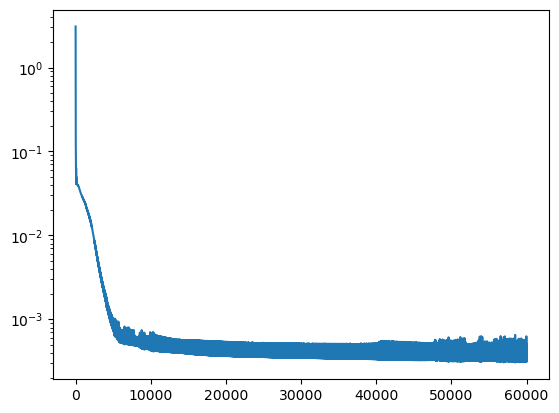

In [178]:
plt.plot(loss_history)
plt.yscale('log')

In [179]:
solutions = diffrax.diffeqsolve(
        diffrax.ODETerm(MODEL),
        diffrax.Tsit5(),
        t0=float(time[0]),
        t1=float(time[-1]),
        dt0=0.01,
        y0=jnp.array(vars, dtype=jnp.float64),  
        stepsize_controller=diffrax.PIDController(rtol=1e-5, atol=1e-6),
        saveat=diffrax.SaveAt(ts=jnp.sort(time)),
    )
solutions.ys[:, 0]


/var/folders/wr/p4g_vhcn34g6101bsy9rmsd40000gn/T/ipykernel_10127/1626643505.py:7: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  y0=jnp.array(vars, dtype=jnp.float64),


Array([0.        , 0.0061738 , 0.01234545, ..., 0.01184401, 0.01185805,
       0.01187202], dtype=float32)

In [180]:
min(loss_history)

Array(0.00030661, dtype=float32)

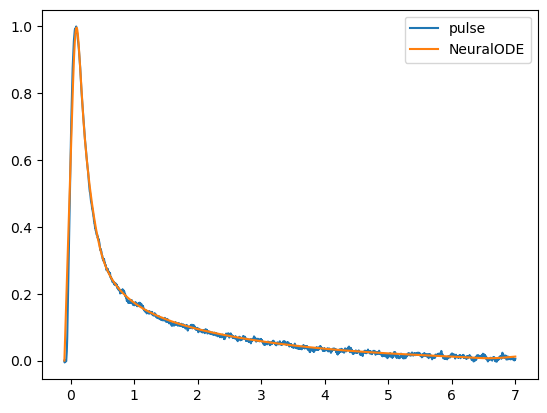

In [181]:
plt.plot(time, energies, label = "pulse")

plt.plot(time, solutions.ys[:, 0], label = "NeuralODE")
#plt.plot(time, energies-solutions.ys[:, 0])

plt.legend()


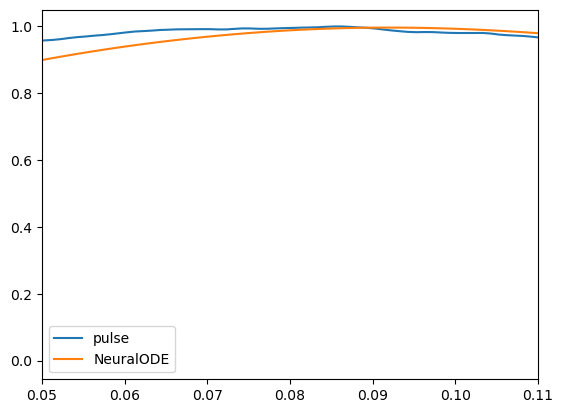

In [182]:
plt.plot(time, energies, label = "pulse")
plt.plot(time, solutions.ys[:, 0], label = "NeuralODE")
#plt.plot(time, energies-solutions.ys[:, 0])
plt.xlim(0.05, 0.11)
plt.legend()

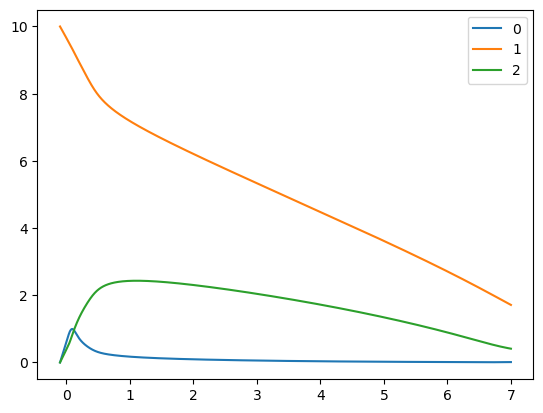

In [183]:
plt.plot(time, solutions.ys[:, 0], label = "0")
plt.plot(time, solutions.ys[:, 1], label = "1")
plt.plot(time, solutions.ys[:, 2], label = "2")


plt.legend()

(-0.1, 10.0)

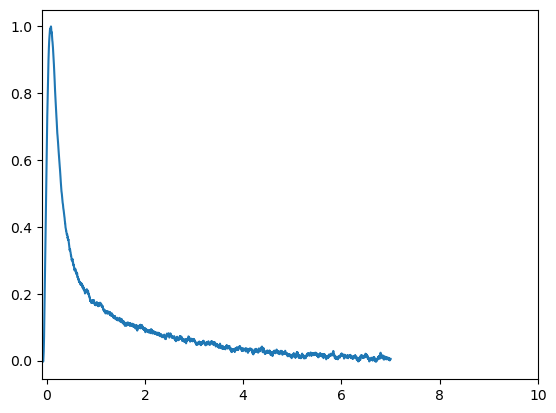

In [184]:
plt.plot(time, energies)
plt.xlim(-0.1, 10)

In [39]:
x = np.random.rand(4, 5)
x.shape

(4, 5)